<a href="https://colab.research.google.com/github/Abie-UTB/Draining-a-Water-Tank-using-Numerical-Solution---A-Comparative-Study/blob/main/Multi_StepMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

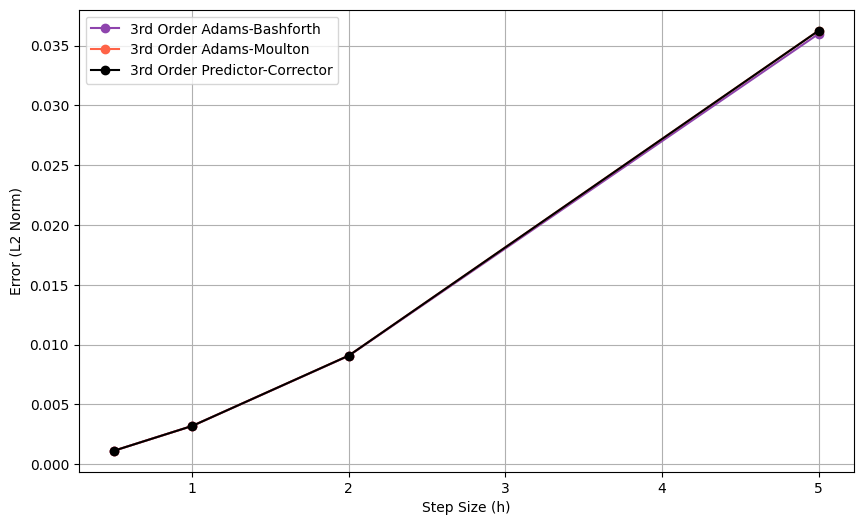

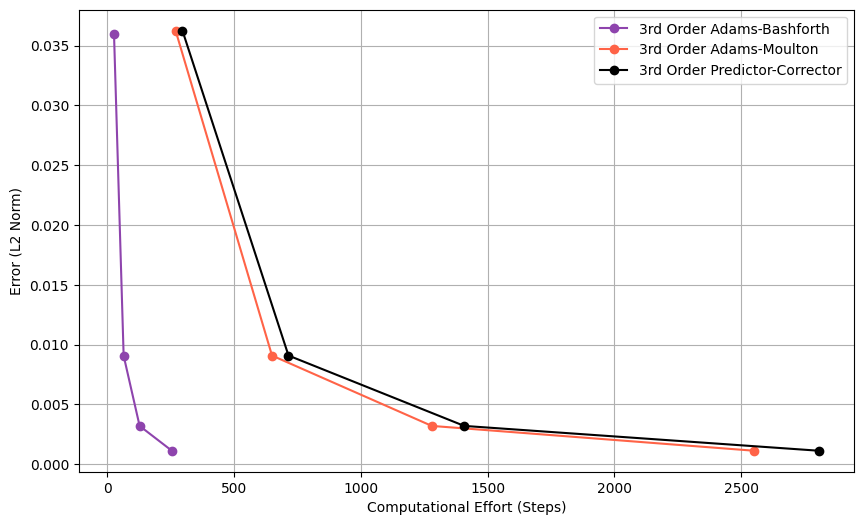

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Custom colors for each method
custom_colors = {
    "euler_method": "#FF5733",           # Bright orange-red
    "implicit_euler": "#33A1FF",         # Sky blue
    "RK4": "#4CAF50",                    # Green
    "Implicit Midpoint": "#FFC300",      # Bright yellow
    "3rd step Adams-Bashforth": "#8E44AD",  # Purple
    "3rd step Adams-Moulton": "#FF6347", # Tomato red
    "3rd step Predictor-Corrector": "#2ECC71"  # Emerald green
}

# Constants
g = 9.81  # Gravitational acceleration
D = 2     # Diameter of the cylinder
d = 0.2   # Diameter of the small hole at the bottom of the cylinder
tend = 127  # End time
initial_level = 8  # Initial water level in the tank

# Function to be solved (Torricelli's law)
def y_dot(t, y):
    return -np.sqrt(2 * g) * (d / D)**2 * np.sqrt(max(y, 0))  # Ensure non-negative y

# Exact solution for comparison
def exact_solution(t):
    return np.maximum((initial_level**0.5 - 0.5 * np.sqrt(2 * g) * (d / D)**2 * t)**2, 0)

# Define numerical methods (implementations reused from earlier)
# Explicit Euler Method
def euler_method(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1] + h * f(t[i], y[-1])
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

# Implicit Euler Method
def implicit_euler(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration for implicit method
            y_next = y[-1] + h * f(t[i + 1], y_next)
            y_next = max(y_next, 0)  # Ensure non-negative y
        y.append(y_next)
    return np.array(y)

# Implicit Midpoint Method
def implicit_midpoint(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        y_next = y[-1]
        for _ in range(10):  # Fixed-point iteration for implicit midpoint method
            midpoint_time = (t[i] + t[i + 1]) / 2
            y_midpoint = (y[-1] + y_next) / 2
            y_next = y[-1] + h * f(midpoint_time, y_midpoint)
            y_next = max(y_next, 0)  # Ensure non-negative y
        y.append(y_next)
    return np.array(y)

# Runge-Kutta 4th Order (RK4)
def runge_kutta_4(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        k1 = f(t[i], y[-1])
        k2 = f(t[i] + h / 2, y[-1] + h / 2 * k1)
        k3 = f(t[i] + h / 2, y[-1] + h / 2 * k2)
        k4 = f(t[i] + h, y[-1] + h * k3)
        y_next = y[-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

# Define Adams-Bashforth, Adams-Moulton, Predictor-Corrector (implementations from earlier)
# 3rd Order Adams-Bashforth Method
def adams_bashforth_3(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        if i == 0:
            # Use Euler method to bootstrap
            y_next = y[-1] + h * f(t[i], y[-1])
        elif i == 1:
            # Use 2nd-order Adams-Bashforth for the second step
            y_next = y[-1] + h * (1.5 * f(t[i], y[-1]) - 0.5 * f(t[i - 1], y[-2]))
        else:
            # 3rd-order Adams-Bashforth
            y_next = y[-1] + h * (
                23 / 12 * f(t[i], y[-1])
                - 16 / 12 * f(t[i - 1], y[-2])
                + 5 / 12 * f(t[i - 2], y[-3])
            )
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)

# 3rd Order Adams-Moulton Method
def adams_moulton_3(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        if i == 0:
            # Use Euler method to bootstrap
            y_next = y[-1] + h * f(t[i], y[-1])
        elif i == 1:
            # Use 2nd-order Adams-Moulton for the second step
            y_next = y[-1]
            for _ in range(10):  # Fixed-point iteration
                y_next = y[-1] + h / 2 * (
                    f(t[i + 1], y_next) + f(t[i], y[-1])
                )
        else:
            # 3rd-order Adams-Moulton
            y_next = y[-1]
            for _ in range(10):  # Fixed-point iteration
                y_next = y[-1] + h * (
                    5 / 12 * f(t[i + 1], y_next)
                    + 8 / 12 * f(t[i], y[-1])
                    - 1 / 12 * f(t[i - 1], y[-2])
                )
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)


# 3rd Order Predictor-Corrector
def predictor_corrector(f, y0, t, h):
    y = [y0]
    for i in range(len(t) - 1):
        if i == 0:
            # Use Euler method to bootstrap
            y_next = y[-1] + h * f(t[i], y[-1])
        elif i == 1:
            # Use 2nd-order Predictor-Corrector for the second step
            y_predictor = y[-1] + h * (1.5 * f(t[i], y[-1]) - 0.5 * f(t[i - 1], y[-2]))
            y_corrector = y[-1]
            for _ in range(10):  # Fixed-point iteration
                y_corrector = y[-1] + h / 2 * (
                    f(t[i + 1], y_corrector) + f(t[i], y[-1])
                )
            y_next = y_corrector
        else:
            # 3rd-order Predictor-Corrector
            y_predictor = y[-1] + h * (
                23 / 12 * f(t[i], y[-1])
                - 16 / 12 * f(t[i - 1], y[-2])
                + 5 / 12 * f(t[i - 2], y[-3])
            )
            y_corrector = y[-1]
            for _ in range(10):  # Fixed-point iteration
                y_corrector = y[-1] + h * (
                    5 / 12 * f(t[i + 1], y_corrector)
                    + 8 / 12 * f(t[i], y[-1])
                    - 1 / 12 * f(t[i - 1], y[-2])
                )
            y_next = y_corrector
        y.append(max(y_next, 0))  # Ensure non-negative y
    return np.array(y)
# Step sizes and methods
step_sizes = [0.5, 1.0, 2.0, 5.0]
methods = {

    "3rd Order Adams-Bashforth": (adams_bashforth_3, 1),
    "3rd Order Adams-Moulton": (adams_moulton_3, 10),
    "3rd Order Predictor-Corrector": (predictor_corrector, 11),
}

errors = {method: [] for method in methods}
efforts = {method: [] for method in methods}

# Evaluate errors and efforts
for h in step_sizes:
    t = np.arange(0, tend + h, h)
    exact = exact_solution(t)
    for method, (func, n_f) in methods.items():
        y_approx = func(y_dot, initial_level, t, h)
        error = np.linalg.norm(exact - y_approx, ord=2)
        errors[method].append(error)
        efforts[method].append(n_f * len(t))

# Custom colors for each method
custom_colors = {
    "Euler (Explicit)": "#5FF573",           # Bright orange-red
    "Euler (Implicit)": "#33A1FF",           # Sky blue
    "RK4": "#4CAF50",                        # Green
    "Implicit Midpoint": "#FFC300",          # Bright yellow
    "3rd Order Adams-Bashforth": "#8E44AD",  # Purple
    "3rd Order Adams-Moulton": "#FF6347",    # Tomato red

}

# Plotting Error vs. Step Size
plt.figure(figsize=(10, 6))
for method, error_values in errors.items():
    plt.plot(
        step_sizes,
        error_values,
        label=method,
        marker='o',
        color=custom_colors.get(method, "#000000")  # Use the specified color or default to black
    )
plt.xlabel("Step Size (h)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Step Size")
plt.legend()
plt.grid()
plt.show()

# Plotting Error vs. Computational Effort
plt.figure(figsize=(10, 6))
for method, effort_values in efforts.items():
    plt.plot(
        effort_values,
        errors[method],
        label=method,
        marker='o',
        color=custom_colors.get(method, "#000000")  # Use the specified color or default to black
    )
plt.xlabel("Computational Effort (Steps)")
plt.ylabel("Error (L2 Norm)")
#plt.title("Error vs. Computational Effort")
plt.legend()
plt.grid()
plt.show()
